# Table of Contents
 <p><div class="lev1 toc-item"><a href="#新词分析" data-toc-modified-id="新词分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>新词分析</a></div><div class="lev2 toc-item"><a href="#新词和未登录词比较" data-toc-modified-id="新词和未登录词比较-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>新词和未登录词比较</a></div><div class="lev2 toc-item"><a href="#新词和登陆词在领域语料和人民日报语料中分布" data-toc-modified-id="新词和登陆词在领域语料和人民日报语料中分布-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>新词和登陆词在领域语料和人民日报语料中分布</a></div><div class="lev2 toc-item"><a href="#识别正确的新词的词性组合" data-toc-modified-id="识别正确的新词的词性组合-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>识别正确的新词的词性组合</a></div><div class="lev1 toc-item"><a href="#新词统计量" data-toc-modified-id="新词统计量-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>新词统计量</a></div><div class="lev2 toc-item"><a href="#新词词长" data-toc-modified-id="新词词长-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>新词词长</a></div><div class="lev2 toc-item"><a href="#新词词频" data-toc-modified-id="新词词频-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>新词词频</a></div><div class="lev2 toc-item"><a href="#新词词性" data-toc-modified-id="新词词性-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>新词词性</a></div><div class="lev2 toc-item"><a href="#新词左右信息熵" data-toc-modified-id="新词左右信息熵-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>新词左右信息熵</a></div><div class="lev2 toc-item"><a href="#新词点互信息" data-toc-modified-id="新词点互信息-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>新词点互信息</a></div><div class="lev2 toc-item"><a href="#登陆词和未登录词" data-toc-modified-id="登陆词和未登录词-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>登陆词和未登录词</a></div><div class="lev1 toc-item"><a href="#实验结果分析" data-toc-modified-id="实验结果分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>实验结果分析</a></div><div class="lev2 toc-item"><a href="#新词发现结果" data-toc-modified-id="新词发现结果-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>新词发现结果</a></div><div class="lev3 toc-item"><a href="#字分割" data-toc-modified-id="字分割-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>字分割</a></div><div class="lev3 toc-item"><a href="#词分割" data-toc-modified-id="词分割-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>词分割</a></div><div class="lev2 toc-item"><a href="#NER识别结果" data-toc-modified-id="NER识别结果-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>NER识别结果</a></div><div class="lev3 toc-item"><a href="#人名识别结果" data-toc-modified-id="人名识别结果-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>人名识别结果</a></div><div class="lev3 toc-item"><a href="#地名识别结果" data-toc-modified-id="地名识别结果-322"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>地名识别结果</a></div><div class="lev3 toc-item"><a href="#地名识别结果" data-toc-modified-id="地名识别结果-323"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>地名识别结果</a></div>

# 新词分析 #

In [119]:
%matplotlib inline
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,7)

unknowFile = "unknown.info"

dataPath = "../"
newWordFile = "../../test/ans/total.txt.src.nw"
dis = pd.read_csv(newWordFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])


def label(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')
    return ax


## 新词和未登录词比较

## 新词和登陆词在领域语料和人民日报语料中分布

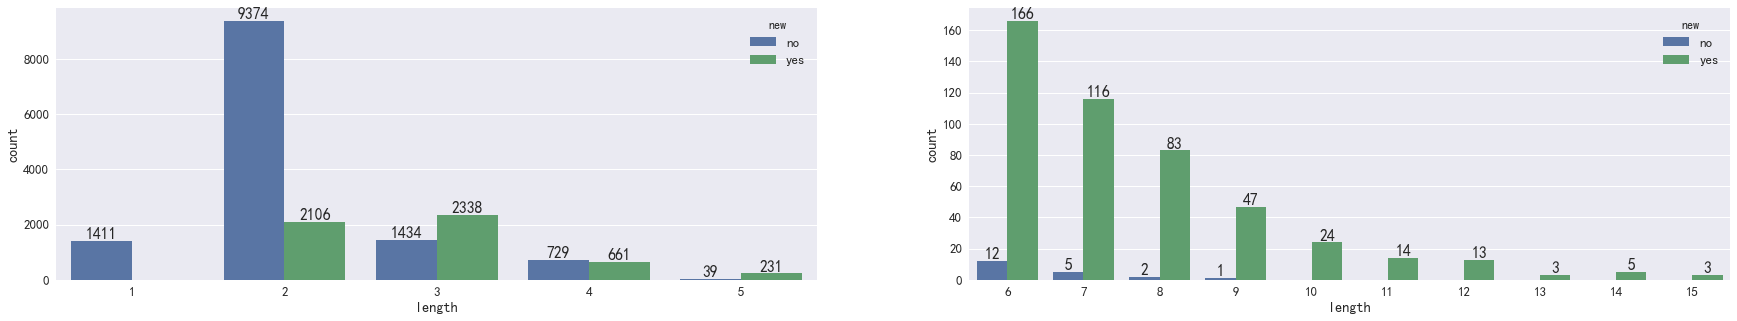

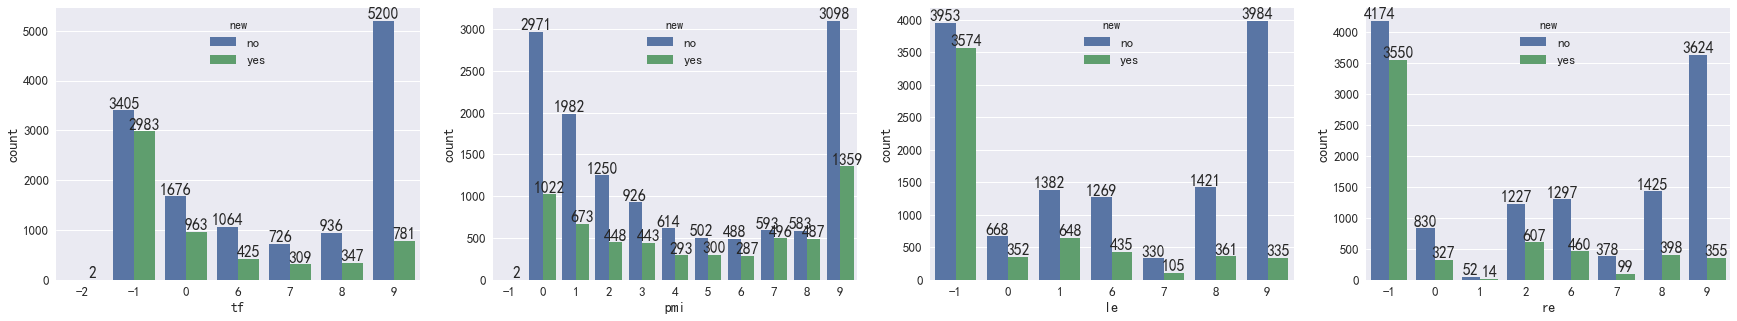

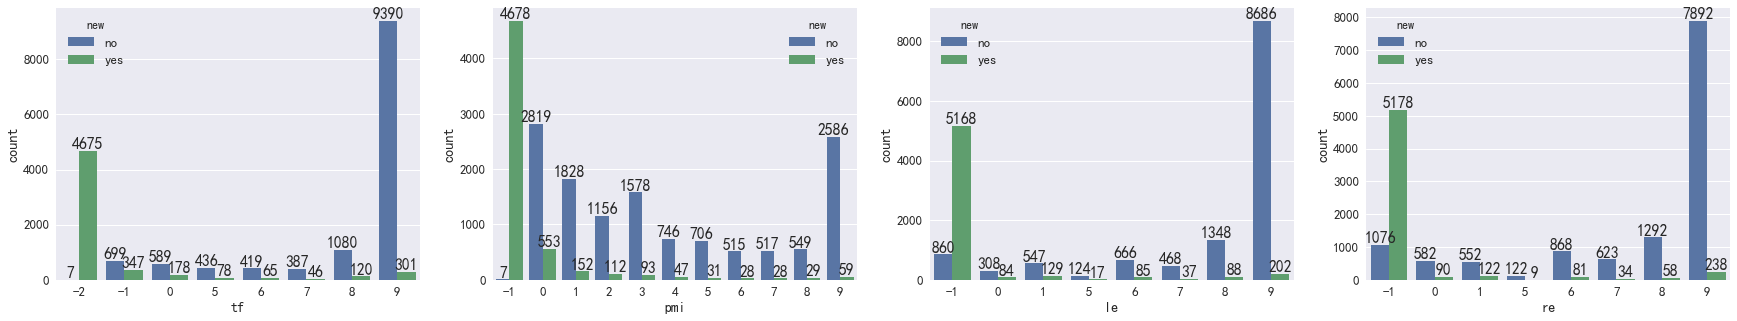

In [9]:
linfo = pd.read_csv("./word.local.info", sep="\\s+", names=["word", "length", "tf", "pmi", "le", "re", "new"])
ginfo = pd.read_csv("./word.renmin.info", sep="\\s+", names=["word", "length", "tf", "pmi", "le", "re", "new"])
info = linfo
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(30, 5)
label(sns.countplot(x="length", hue="new", data=info[info["length"] <= 5], ax=axs[0]))
label(sns.countplot(x="length", hue="new", data=info[info["length"] > 5], ax=axs[1], hue_order=["no", "yes"]))
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new", data=info, ax=axs[3]))

info = ginfo
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new", data=info, ax=axs[3]))

Int64Index([-1, 0, 1, 5, 6, 7, 8, 9], dtype='int64')


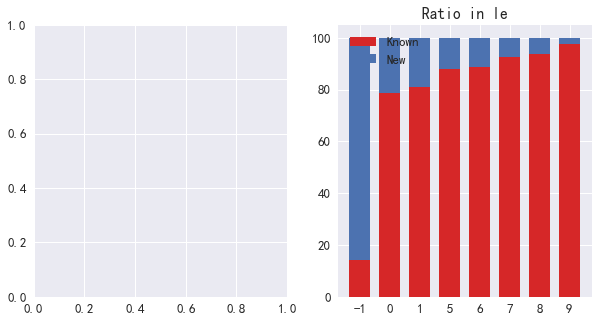

In [16]:
tag="le"
tmp=ginfo#[info["length"] < 10]
yes = tmp[tmp["new"].str.contains("yes")][tag].value_counts().sort_index()
no = tmp[tmp["new"].str.contains("no")][tag].value_counts().sort_index()
totals = [i+j for i,j in zip(yes, no)]
# Create the percentage of the total score the pre_score value for each participant was
yes_rel = [i / j * 100 for  i,j in zip(yes, totals)]
# Create the percentage of the total score the mid_score value for each participant was
no_rel = [i / j * 100 for  i,j in zip(no, totals)]

f, axs = plt.subplots(figsize=(10,5), ncols=2)
ax=axs[1]
print(yes.index)
N = len(yes)
ind = np.arange(N)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence
p1 = ax.bar(ind, no_rel, width, color='#d62728')
p2 = ax.bar(ind, yes_rel, width,bottom=no_rel)
#ax.ylabel('Percentage')
ax.set_title('Ratio in ' + tag)
plt.xticks(ind, yes.index)
#ax.set_xticks(ind, yes.index)
#ax.set_yticklabels(np.arange(0, 100, 10))
ax.legend((p1[0], p2[0]), ('Known', 'New'))
#plt.show()

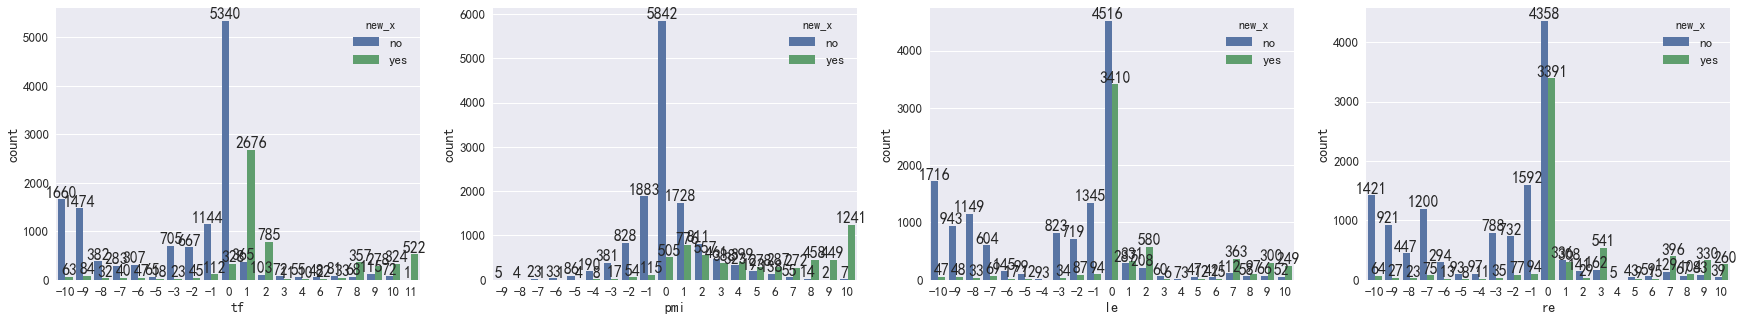

In [90]:
info = pd.merge(linfo, ginfo, on='word')
info["tf"]=info["tf_x"]-info["tf_y"]
info["pmi"]=info["pmi_x"]-info["pmi_y"]
info["le"]=info["le_x"]-info["le_y"]
info["re"]=info["re_x"]-info["re_y"]
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new_x", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new_x", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new_x", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new_x", data=info, ax=axs[3]))

In [ ]:
sns.jointplot(x="tf_x", y="tf_y", data=info[info["new_x"].str.contains("yes") & (info["tf_x"] >4 )], kind="hex")

In [17]:
info[info["new_x"].str.contains("yes") & (info["tf_x"]>5) & (info["tf_y"]<5)].shape

KeyError: 'new_x'

In [ ]:
src[src["word"].str.contains("^\\d")]

In [ ]:
label(sns.countplot(x="tf",hue="answer", data=pre))

In [ ]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
label(sns.countplot(x="length",hue="answer", data=recall, ax=axs[0]))
label(sns.countplot(x="tf",hue="answer", data=recall, ax=axs[1]))
label(sns.countplot(x="pos",hue="answer", data=recall, ax=axs[2]))

In [ ]:
label(sns.countplot(x="pos",hue="answer", data=recall))

## 识别正确的新词的词性组合

In [12]:
pre[pre["answer"].str.contains("yes") & pre["word"].str.contains(".") & pre["pos"].str.contains("/") & (pre["word"].str.len() == 2)]

NameError: name 'pre' is not defined

# 新词统计量

## 新词词长

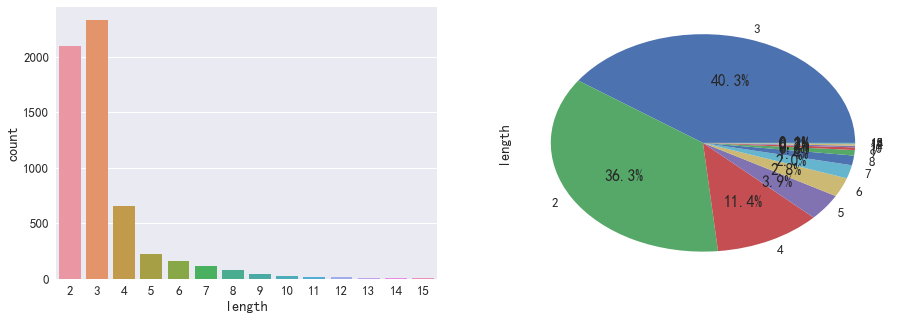

In [131]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
sns.countplot(dis["length"], ax=axs[0])
dis["length"].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1])

## 新词词频

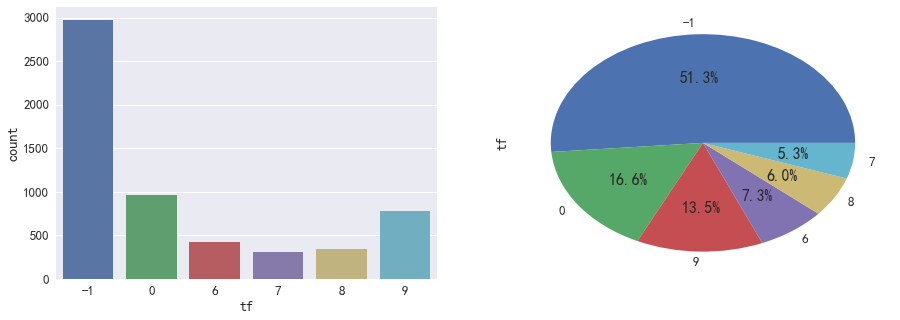

In [132]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
sns.countplot(dis["tf"], ax=axs[0])
dis["tf"].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1])

## 新词词性

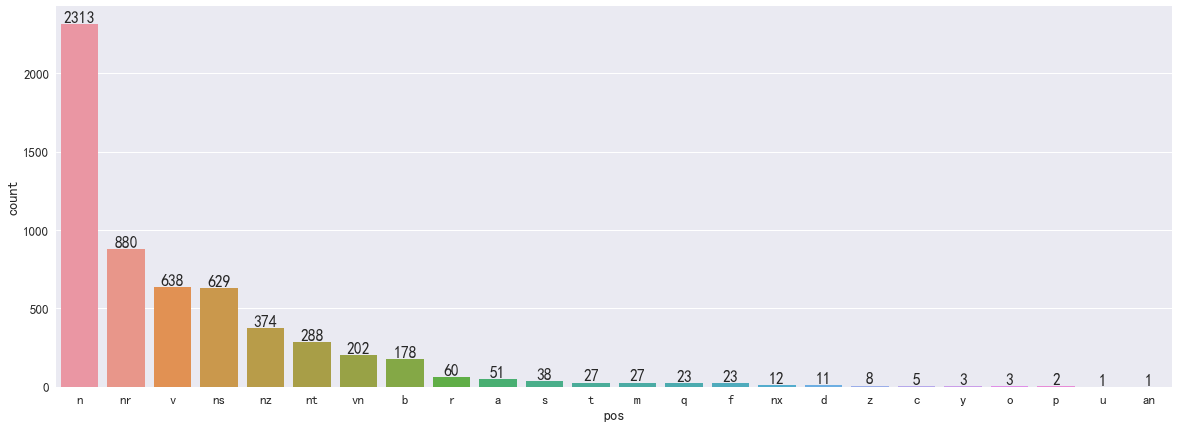

In [117]:
tmp = dis.groupby('pos').filter(lambda x: len(x) > 0)
ax = sns.countplot(tmp["pos"], order=tmp.groupby('pos').size().sort_values(ascending=False).index)
label(ax)

In [130]:
tmp = dis.groupby('pos').filter(lambda x: len(x) < 20)
#tmp = dis[dis["pos"].str.contains("^an")]
tmp = dis[(dis["pmi"] <5) & (dis["length"] == 2)]
tmp.sort("pmi", ascending=True)


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,word,type,length,pos,tf,pmi,le,re
2729,空载,纯汉字,2,vn,6,0,-1,0
4043,求于,纯汉字,2,v,0,0,-1,2
2154,战死,纯汉字,2,v,9,0,7,6
4040,围援,纯汉字,2,v,-1,0,-1,-1
4035,习总,纯汉字,2,nr,0,0,-1,2
4027,变天,纯汉字,2,v,-1,0,-1,-1
2168,治伤,纯汉字,2,v,-1,0,-1,-1
2178,中士,纯汉字,2,n,0,0,1,-1
4025,战端,纯汉字,2,n,-1,0,-1,-1
2186,主炮,纯汉字,2,n,8,0,7,8


## 新词左右信息熵

In [ ]:
fig, axs = plt.subplots(figsize=(20,5), ncols=2)
sns.countplot(dis["le"], ax=axs[0])
sns.countplot(dis["re"], ax=axs[1])

In [ ]:
countplot(dis["pmi"])

In [ ]:
countplot(dis["tf"])

In [ ]:
sns.jointplot(x="le", y="tf", data=dis)

In [ ]:
sns.jointplot(x="re", y="tf", data=dis)

In [ ]:
sns.jointplot(x="le", y="re", data=dis)

## 新词点互信息

In [ ]:
sns.jointplot(x="tf", y="pmi", data=dis)

In [ ]:
sns.jointplot(x="le", y="re", data=src)

In [ ]:
g = sns.pairplot(dis)

In [ ]:
# src["pos"][src.groupby("pos").count() < 10]
src.groupby('pos').filter(lambda x: len(x) <= 12)

## 登陆词和未登录词

In [ ]:
# -*- coding: utf-8 -*- 
from pylab import mpl
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
unknownFile = "unknow.info"
src = pd.read_csv(unknownFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
src["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("未登录词分布")

In [ ]:
dis["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")


# 实验结果分析

## 新词发现结果

### 字分割

In [105]:
dataPath = "../"
recallFile = dataPath + "CharacterCRF..r"
preFile = dataPath + "CharacterCRF..p"
recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "ans"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "context", "cseg","wseg", "pos", "boundary","nothing", "label","ans"]).drop("nothing", axis=1)
wrong=pre[~pre["ans"]]
recall[~recall["ans"]]
#wrong["exact"]=wrong["word"].isin(linfo["word"])
#wrong

,word,type,length,pos,tf,pmi,le,re,ans
0,中国驻缅甸大使馆,纯汉字,8,nt,9,3,0,8,False
2,在航,纯汉字,2,vn,9,0,8,9,False
5,遥遥相望,纯汉字,4,v,-1,9,-1,-1,False
11,长炮筒,纯汉字,3,n,-1,8,-1,-1,False
13,萨马瓦,纯汉字,3,ns,-1,8,-1,-1,False
19,伊尔－３８,混合,5,nz,6,6,-1,0,False
22,德尔塔ＩＶ,混合,5,nz,-1,8,-1,-1,False
23,幻影２０００,混合,6,nz,-1,3,-1,-1,False
26,混成旅,纯汉字,3,n,7,9,1,2,False
42,一千九百五十一,纯汉字,7,m,-1,4,-1,-1,False


### 词分割

In [5]:
dataPath = "../"
#recallFile = dataPath + "WordCRF.nw..r"
#preFile = dataPath + "WordCRF.nw..p"
#recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "answer"])
#pre = pd.read_csv(preFile, sep="\\s+", names=["word", "seg", "length", "pos", "tf", "pmi", "le", "re", "tfPre", "nothing", "label","answer"])
pre[pre["answer"].str.contains(".") & pre["word"].str.contains("茨") & pre["pos"].str.contains(".") & ~pre["pos"].str.contains("[li]")]

NameError: name 'pre' is not defined

In [ ]:
recall[recall["answer"].str.contains("no") & recall["pos"].str.contains("nr") & recall["word"].str.contains(".")  & (recall["tf"])]

## NER识别结果

### 人名识别结果

In [91]:
dataPath = "../"
recallFile = dataPath + "CharacterCRF.nr.r"
preFile = dataPath + "CharacterCRF.nr.p"
recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "ans"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "context", "cseg","wseg", "pos", "boundary","nothing", "label","ans"]).drop("nothing", axis=1)
wrong=pre[pre["ans"].str.contains("no")]
wrong["exact"]=wrong["word"].isin(linfo["word"])
wrong
#linfo[linfo["word"].str.contains("维克拉")]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,word,context,cseg,wseg,pos,boundary,label,ans,exact
6,巴布尔,７００公里射程的巴布尔（,巴/布/尔,巴/布尔/布尔,j/n/n,S/B/E,nrB/nrM/nrE,no,True
13,维克拉玛蒂亚,求俄罗斯方面保证“维克拉玛蒂亚”,维/克/拉/玛/蒂/亚,维/克拉/克拉/玛/蒂/亚,j/q/q/nr/n/j,S/B/E/S/S/S,nrB/nrM/nrM/nrM/nrM/nrE,no,True
16,朱诺评论,缅甸问题的分析人士朱诺评论说,朱/诺/评/论,朱/诺/评论/评论,nr/ng/n/n,S/S/B/E,nrB/nrM/nrM/nrE,no,False
17,缅贼昂山,缅贼昂山趁,缅/贼/昂/山,缅/贼/昂/山,j/n/vg/n,S/S/S/S,nrB/nrM/nrM/nrE,no,False
24,穆罕默德·本·马哈夫,阿曼空军司令穆罕默德·本·马哈夫兹,穆/罕/默/德/·/本/·/马/哈/夫,穆/罕/默/德/·/本/·/马/哈/夫,j/ad/ng/j/w/r/w/n/j/ng,S/S/S/S/S/S/S/S/S/S,nrB/nrM/nrM/nrM/nrM/nrM/nrM/nrM/nrM/nrE,no,False
40,帕拉丁,师装备了最先进的“帕拉丁”,帕/拉/丁,帕/拉丁/拉丁,ng/nz/nz,S/B/E,nrB/nrM/nrE,no,True
44,法蒂玛泣声,法蒂玛泣声问,法/蒂/玛/泣/声,法/蒂/玛/泣/声,j/n/nr/ng/q,S/S/S/S/S,nrB/nrM/nrM/nrM/nrE,no,False
47,塔米洛夫,特警和内务部队在甘塔米洛夫指,塔/米/洛/夫,塔/米/洛/夫,j/q/j/ng,S/S/S/S,nrB/nrM/nrM/nrE,no,False
49,李珍 柳玉鹏,球时报驻日本特约记者李珍 柳玉鹏】,李/珍/ /柳/玉/鹏,李/珍/ /柳/玉/鹏,nr/ag/null/ng/n/nr,S/S/S/S/S/S,nrB/nrM/nrM/nrM/nrM/nrE,no,False
56,昂山素季时,见来访的缅甸国务资政昂山素季时表,昂/山/素/季/时,昂/山/素/季/时,vg/n/dg/ng/ng,S/S/S/S/S,nrB/nrM/nrM/nrM/nrE,no,False


In [66]:
recall[recall["ans"].str.contains("yes")].sort("tf", ascending=False)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,word,type,length,pos,tf,pmi,le,re,ans
141,周恩来,纯汉字,3,nr,9,7,6,9,yes
153,陆慷,纯汉字,2,nr,9,9,1,9,yes
151,丁达尔,纯汉字,3,nr,9,8,6,7,yes
149,费特胡拉·居伦,汉字加连字符斜杠分隔符,7,nr,9,9,6,9,yes
33,凯末尔,纯汉字,3,nr,9,8,6,8,yes
37,希拉里,纯汉字,3,nr,9,7,1,9,yes
41,奥巴马,纯汉字,3,nr,9,9,9,9,yes
44,华春莹,纯汉字,3,nr,9,9,0,9,yes
140,耶尔德勒姆,纯汉字,5,nr,9,9,6,9,yes
134,居兰,纯汉字,2,nr,9,3,8,8,yes


### 地名识别结果

In [96]:
dataPath = "../"
recallFile = dataPath + "CharacterCRF.ns.r"
preFile = dataPath + "CharacterCRF.ns.p"
recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "ans"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "context", "cseg","wseg", "pos", "boundary","nothing", "label","ans"]).drop("nothing", axis=1)
wrong=pre[pre["ans"].str.contains("no")]
wrong["exact"]=wrong["word"].isin(linfo["word"])
wrong[wrong["exact"]]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,word,context,cseg,wseg,pos,boundary,label,ans,exact
7,伊洛瓦底,停了中资在克钦邦内伊洛瓦底江,伊/洛/瓦/底,伊/洛/瓦/底,j/j/n/f,S/S/S/S,nsB/nsM/nsM/nsE,no,True
16,核,对中国在核供应集团就印核交,核,核,n,S,nsS,no,True
22,汉,果敢百姓外迁实为缅汉难,汉,汉,j,S,nsS,no,True
23,东盟,泰国逐渐成为东盟新,东/盟,东盟/东盟,ns/ns,B/E,nsB/nsE,no,True
49,高山,但涡轮式发动机在高山、,高/山,高/山,a/n,S/S,nsB/nsE,no,True
52,妙瓦底,缅军官媒《妙瓦底新,妙/瓦/底,妙/瓦/底,a/n/f,S/S/S,nsB/nsM/nsE,no,True
60,土司,仍由土司、,土/司,土司/土司,n/n,B/E,nsB/nsE,no,True
65,巴尔干,的小亚细亚半岛和南欧巴尔干半,巴/尔/干,巴尔干/巴尔干/巴尔干,ns/ns/ns,B/M/E,nsB/nsM/nsE,no,True
80,萨尔顿,分阶段将目前设在沙特阿拉伯萨尔顿王,萨/尔/顿,萨/尔/顿,j/nr/q,S/S/S,nsB/nsM/nsE,no,True
90,彭线,勐古地区的勐古城郊、棒赛、彭线、,彭/线,彭/线,nr/n,S/S,nsB/nsE,no,True


In [64]:
recall[recall["ans"].str.contains("yes")].sort("tf", ascending=False)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,word,type,length,pos,tf,pmi,le,re,ans
0,外交部,纯汉字,3,nt,9,3,9,9,yes
42,北约,纯汉字,2,nt,9,2,9,9,yes
100,国防部,纯汉字,3,nt,9,2,9,9,yes
99,新华社,纯汉字,3,nt,9,7,6,9,yes
70,联合国,纯汉字,3,nt,9,1,9,9,yes
63,欧盟,纯汉字,2,nt,9,7,9,9,yes
58,土耳其政府,纯汉字,5,nt,9,1,9,9,yes
57,法新社,纯汉字,3,nt,9,6,6,8,yes
60,阿纳多卢通讯社,纯汉字,7,nt,9,9,8,6,yes
29,东盟,纯汉字,2,nt,9,6,9,9,yes


### 团体识别结果

In [94]:
dataPath = "../"
recallFile = dataPath + "CharacterCRF.nt.r"
preFile = dataPath + "CharacterCRF.nt.p"
recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "ans"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "context", "cseg","wseg", "pos", "boundary","nothing", "label","ans"]).drop("nothing", axis=1)
pre[pre["ans"].str.contains("no")]

,word,context,cseg,wseg,pos,boundary,label,ans
0,民主联盟,昂山素季领导的全国民主联盟（,民/主/联/盟,民主联盟/民主联盟/民主联盟/民主联盟,n/n/n/n,B/M/M/E,ntB/ntM/ntM/ntE,no
3,缅甸国家电台,缅甸国家电台１,缅/甸/国/家/电/台,缅甸/缅甸/国家/国家/电台/电台,ns/ns/n/n/n/n,B/E/B/E/B/E,ntB/ntM/ntM/ntM/ntM/ntE,no
12,中国海事局,据中国海事局网,中/国/海/事/局,中国/中国/海事/海事/局,ns/ns/n/n/n,B/E/B/E/S,ntB/ntM/ntM/ntM/ntE,no
13,东盟研究院,广西大学中国－东盟研究院泰,东/盟/研/究/院,东盟/东盟/研究院/研究院/研究院,ns/ns/n/n/n,B/E/B/M/E,ntB/ntM/ntM/ntM/ntE,no
16,滇西,并将侵占的中国滇西以,滇/西,滇西/滇西,j/j,B/E,ntB/ntE,no
18,人民党,议会共和人民党副,人/民/党,人民党/人民党/人民党,n/n/n,B/M/E,ntB/ntM/ntE,no
19,俄内务部,俄内务部部,俄/内/务/部,俄/内务部/内务部/内务部,j/nt/nt/nt,S/B/M/E,ntB/ntM/ntM/ntE,no
20,伊拉克政府,伊拉克政府也,伊/拉/克/政/府,伊拉克/伊拉克/伊拉克/政府/政府,ns/ns/ns/n/n,B/M/E/B/E,ntB/ntM/ntM/ntM/ntE,no
23,科研机构国防研究与发展组织,印度军方最高科研机构国防研究与发展组织负,科/研/机/构/国/防/研/究/与/发/展/组/织,科研/科研/机构/机构/国防/国防/研究/研究/与/发展/发展/组织/组织,n/n/n/n/n/n/vn/vn/p/vn/vn/v/v,B/E/B/E/B/E/B/E/S/B/E/B/E,ntB/ntM/ntM/ntM/ntM/ntM/ntM/ntM/ntM/ntM/ntM/nt...,no
27,库国家利益研究中心,在华盛顿智库国家利益研究中心９,库/国/家/利/益/研/究/中/心,库/国家/国家/利益/利益/研究/研究/中心/中心,n/n/n/n/n/vn/vn/n/n,S/B/E/B/E/B/E/B/E,ntB/ntM/ntM/ntM/ntM/ntM/ntM/ntM/ntE,no


In [63]:
recall[recall["ans"].str.contains("yes")].sort("tf", ascending=False)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,word,type,length,pos,tf,pmi,le,re,ans
0,外交部,纯汉字,3,nt,9,3,9,9,yes
42,北约,纯汉字,2,nt,9,2,9,9,yes
100,国防部,纯汉字,3,nt,9,2,9,9,yes
99,新华社,纯汉字,3,nt,9,7,6,9,yes
70,联合国,纯汉字,3,nt,9,1,9,9,yes
63,欧盟,纯汉字,2,nt,9,7,9,9,yes
58,土耳其政府,纯汉字,5,nt,9,1,9,9,yes
57,法新社,纯汉字,3,nt,9,6,6,8,yes
60,阿纳多卢通讯社,纯汉字,7,nt,9,9,8,6,yes
29,东盟,纯汉字,2,nt,9,6,9,9,yes
